# Сборный проект 1

Цель заключается в исследовании данных и проверки гипотез для интернет-магазина компьютерных игр "Стримчик". Нужно выявить закономерности определяющие успешность игры из открытого источника исторических данных о продажах игр.

План:
- Загрузка данных
- Предобработка 
- Исследование данных
- Выявление портрета пользователя каждого региона
- Проверка гипотез
- Составление вывода

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.info())
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


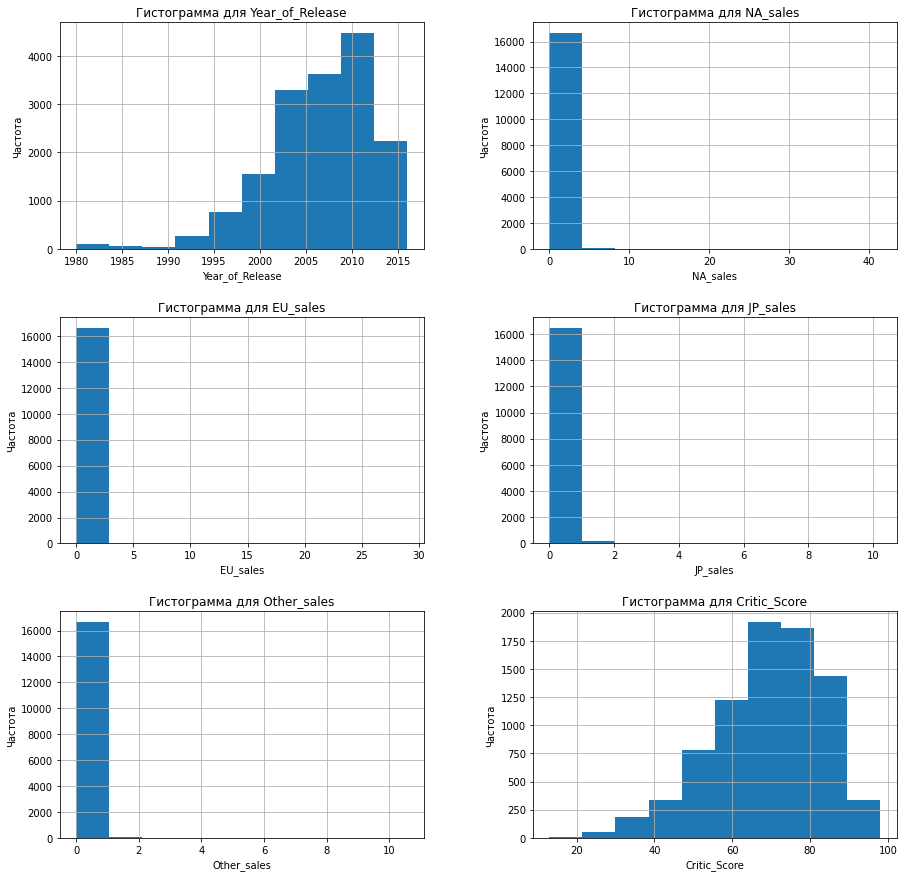

In [3]:
axes = data.hist(figsize=(15, 15))
for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('Частота')  
    ax.set_title(f'Гистограмма для {ax.get_title()}')

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<div class="alert alert-info">
Вывод: В полученных данных есть пустые значения. Названия столбцов следует привести к нижнему регистру. 

## Предобработка

Переименуем столбцы.

In [6]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

### Пропуски

2 значения не повлияют на исследование, поэтому смело удаляем.

In [7]:
data = data.dropna(subset=['name'])

Заполним пропуски в рейтинге и дате релиза значениями, которые встречаются у игры на разных платформах.

In [8]:
#def fill_year(row):
#    try:
 #       mode = row['year_of_release'].mode().item()
  #      row['year_of_release'] = row['year_of_release'].fillna(mode)
   #     return row
    #except:
     #   return row
    
#data=data.groupby('name').apply(fill_year).reset_index(drop=True)
data = data.dropna(subset=['year_of_release'])

In [9]:
#def fill_rating(row):
 #   try:
  #      mode = row['rating'].mode().item()
   #     row['rating'] = row['rating'].fillna(mode)
    #    return row
    #except:
     #   return row
    
#data=data.groupby('name').apply(fill_rating).reset_index(drop=True)

Заполним оставшиеся пропуски значениями-триггерами, так как удалить их нельзя (потеряем слишком много данных) и заменить на исскуственные значения не получится. В столбце оценки игроков есть значение tbd (to be determined), т.е. оценка для игры еще не определена.

In [10]:
data['critic_score'] = data['critic_score'].fillna(111).astype(int)
data['year_of_release'] = data['year_of_release'].fillna(0).astype(int)
data['rating'] = data['rating'].fillna('no rating')

data['user_score'] = data['user_score'].fillna('tbd')
data.loc[data['user_score'] == 'tbd', 'user_score'] = 11
data['user_score'] = pd.to_numeric(data['user_score'], errors='raise')

Заменим тип данных у даты релиза и оценки критиков на int для удобства восприятия. А для оценки игроков поменяем на float.

In [11]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

</font><font color='Blue'><b>
Пропуски могли возникнуть из-за недостаточной популярности игры, и от этого отсутвуют оценки. Рейтинг мог не ставится для игр, которые выпускались не только для игр NA. </b></font><br>

### Дупликаты

In [12]:
data.duplicated().sum()

0

In [13]:
data[['name', 'platform', 'year_of_release']].duplicated().sum()

1

In [14]:
data = data.loc[data[['name', 'platform', 'year_of_release']].duplicated() == False]
len(data)

16443

In [15]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [16]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

</font><font color='Blue'><b>Неявные дубликаты не обнаружены в платформах и жанрах. Встретилось два явных дупликата. Удалили их.

Добавим колонку продаж по всему миру.

In [17]:
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [18]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,111,11.0,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,111,11.0,no rating,31.38


<div class="alert alert-info">
Вывод: Для удобства были заменены типы данных у даты релиза игры, оценки критиков и игроков, переименованы столбцы. Для дальнейшего исследования добавлен столбец с общими продажами.

In [19]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ

### Кол-во игр в год

Создадим график, чотбы посмотреть сколько игр выпускалось каждый год.

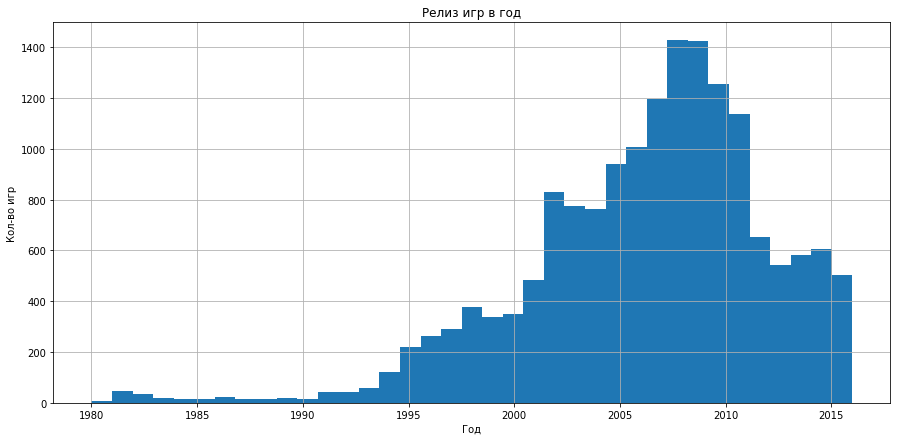

In [20]:
#data.query('year_of_release > 0')['year_of_release'].hist(figsize=(15, 7), bins=30);
data.query('year_of_release > 0')['year_of_release'].hist(figsize=(15, 7), bins=37);
plt.title('Релиз игр в год')
plt.xlabel('Год')
plt.ylabel('Кол-во игр');

До 1995 года игры выходили довольно редко, поэтому эти данные не слишком важны для исследования.

### Продажи по платформам

Посмотрим на продажи по платформам.

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


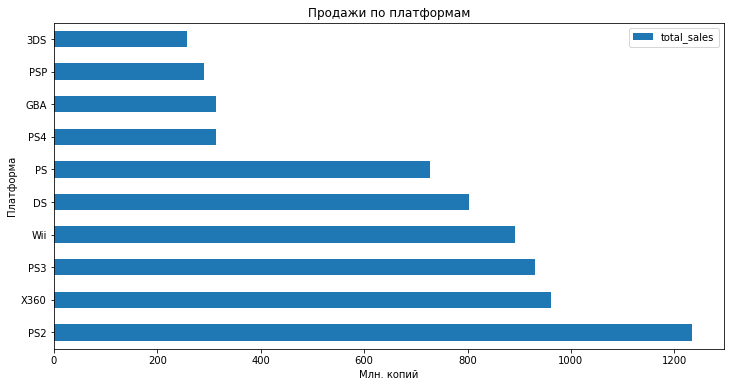

In [21]:
platform_data = (data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                 .sort_values(by='total_sales', ascending=False))
display(platform_data.head(10))
platform_data.head(10).plot(kind='barh', figsize=(12, 6));
plt.title('Продажи по платформам')
plt.xlabel('Млн. копий')
plt.ylabel('Платформа');

In [22]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

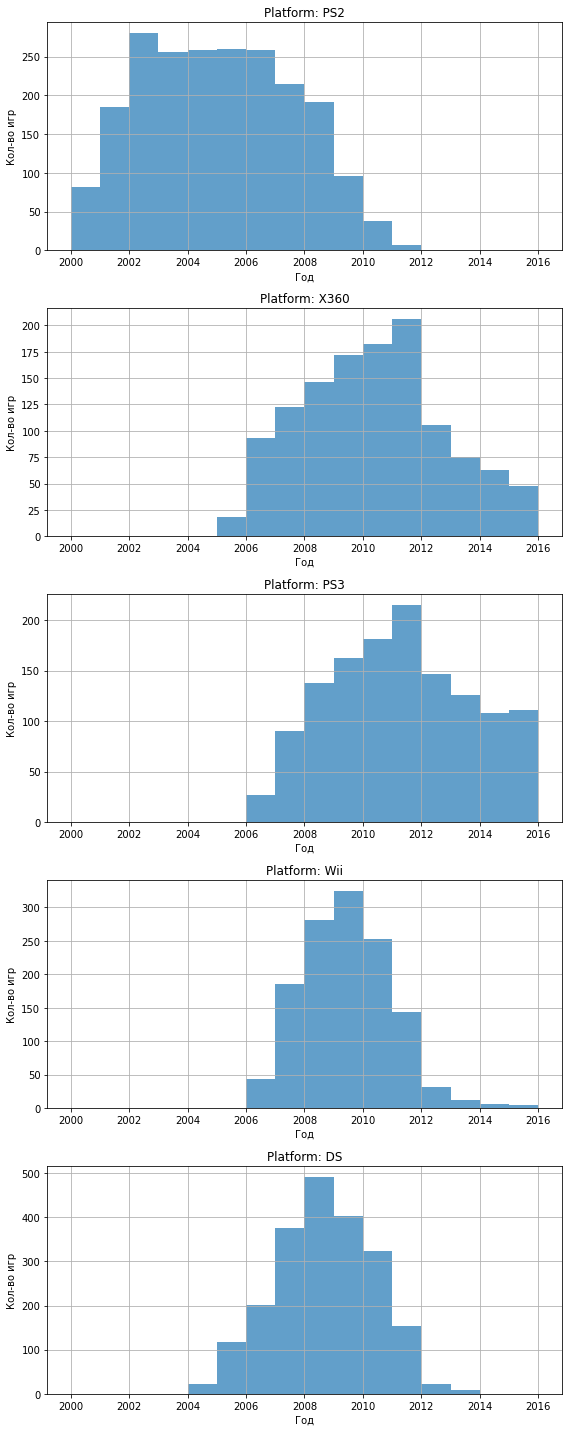

In [23]:
fig, axes = plt.subplots(nrows=len(platforms), ncols=1, figsize=(8, 4 * len(platforms)))

for i, p in enumerate(platforms):
    ax = axes[i]
    data.query('platform == @p and year_of_release > 0')['year_of_release']\
        .hist(ax=ax, alpha=0.7, range=(2000, 2016), bins=16)
    ax.set_title(f'Platform: {p}')
    ax.set_xlabel('Год')
    ax.set_ylabel('Кол-во игр')

plt.tight_layout()
plt.show()

In [24]:
data_stat = (data.query('year_of_release > 0').groupby(['platform', 'year_of_release'])
             .agg({'total_sales':'sum', 'year_of_release': 'count'}))
data_stat.columns = ['year_sales', 'games_count']
data_stat.tail(20)

year_sales  games_count
platform year_of_release                         
X360     2010                 170.03          182
         2011                 143.84          206
         2012                  99.74          106
         2013                  88.58           75
         2014                  34.74           63
         2015                  11.96           35
         2016                   1.52           13
XB       2000                   0.99            1
         2001                  22.26           33
         2002                  48.01          158
         2003                  55.04          189
         2004                  65.42          177
         2005                  49.08          179
         2006                  10.04           62
         2007                   0.55            3
         2008                   0.18            1
XOne     2013                  18.96           19
         2014                  54.07           61
         2015                  60.14           80
         2016                  26.15           87

Возьмем актуальный период с 2012 года. За этот промежуток времени можно будет примерно понять где продажи будут падать, а где расти.

In [25]:
# Комментарий ревьюера
temp = data[data.year_of_release != 0].copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

</font><font color='Blue'><b> Срок жизни платформы составляет 7 лет.

 ### Актуальный период

In [26]:
#actual_data = data.query('year_of_release > 2005')
actual_data = data.query('year_of_release > 2011')
display(len(actual_data))
display(actual_data['platform'].unique())
actual_data.head(10)

2885

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,111,11.0,no rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,111,11.0,no rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,111,11.0,no rating,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78,7.2,E,9.90


### Потенциально прибыльные платформы

In [27]:
platform_data = (actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                .sort_values(by='total_sales', ascending=False).head(20))
platform_data

,total_sales
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


В лидерах по продажам Xbox360, PS3, XboxOne, 3DS, PS4.

In [28]:
adata = actual_data.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
adata.fillna(0)

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,0.00,0.00,0.00
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.35,113.25,47.76,16.82,3.60
PS4,0.00,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,0.00
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


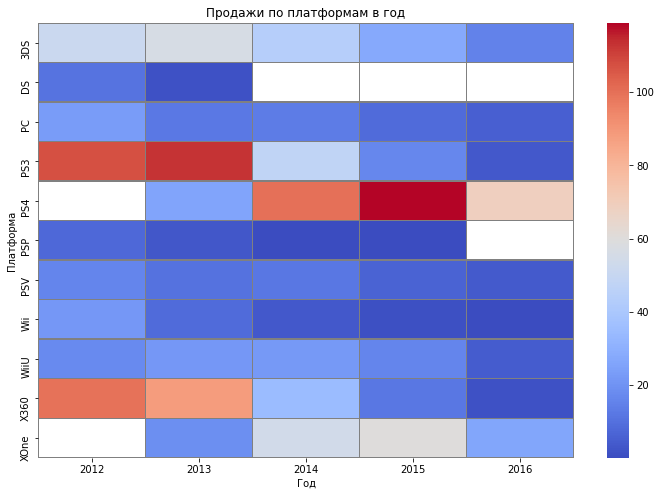

In [29]:
plt.figure(figsize=(12, 8))
seaborn.heatmap(adata, cmap='coolwarm', linewidths=0.5, linecolor='gray');
plt.title('Продажи по платформам в год')
plt.xlabel('Год')
plt.ylabel('Платформа');

Так как данные за 2016 год неполные, то продажи не стоит точно воспринимать. Потенциально прибыльные платформы XboxOne, PS4, WiiU, 3DS.

### «Ящик с усами» по глобальным продажам игр

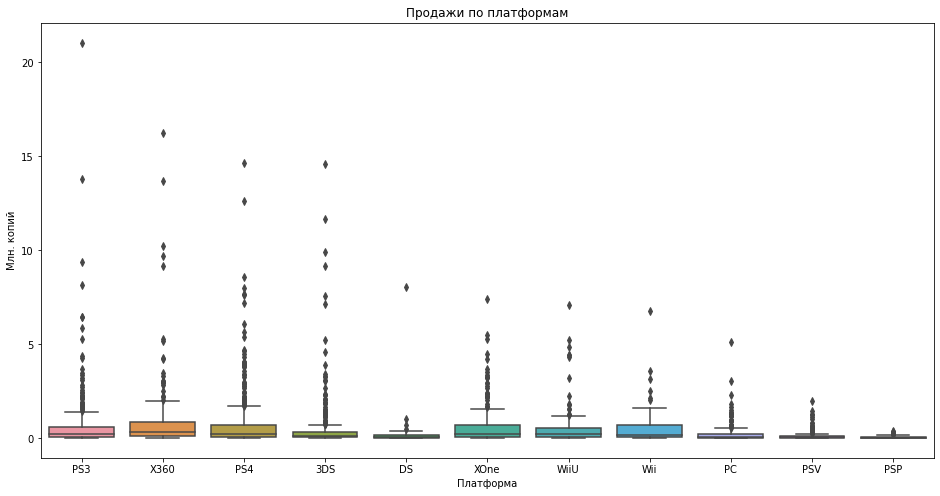

In [30]:
plt.figure(figsize=(16, 8))
seaborn.boxplot(x='platform',
               y='total_sales',
               data=actual_data)
#plt.ylim(0, 3);
plt.title('Продажи по платформам')
plt.ylabel('Млн. копий')
plt.xlabel('Платформа');

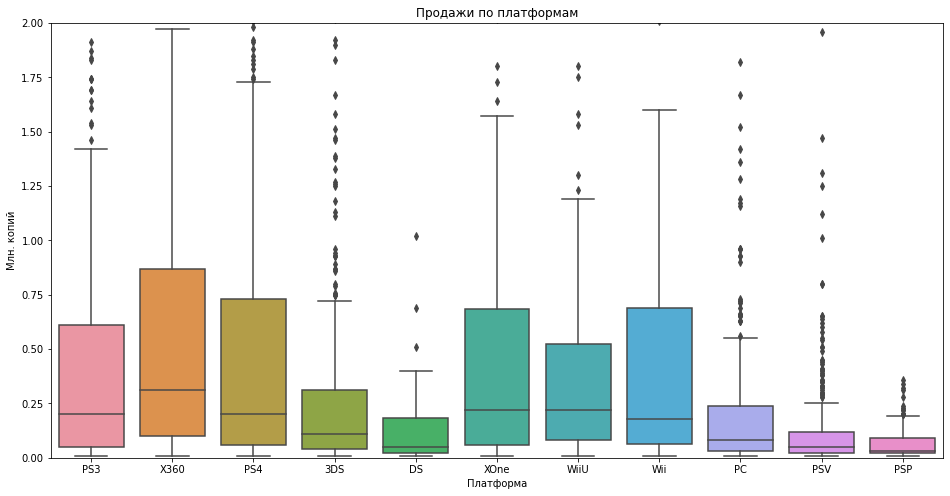

In [31]:
plt.figure(figsize=(16, 8))
seaborn.boxplot(x='platform',
               y='total_sales',
               data=actual_data)
plt.ylim(0, 2);
plt.title('Продажи по платформам')
plt.ylabel('Млн. копий')
plt.xlabel('Платформа');

Продажи по платформам в основном до 2 млн. проданных копий. Медианное значение не выше 0,5 млн копий.

### Влияние отзывов

Посмотрим на зависимость оценок и продаж для Xbox360.

0.3605734888507336

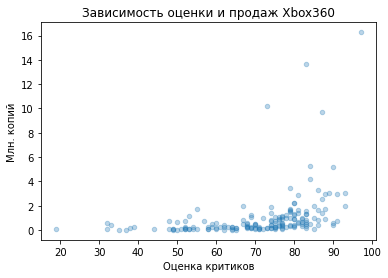

In [32]:
popular_data = actual_data.query('platform == "X360" and critic_score < 111')
popular_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3);
display(popular_data['critic_score'].corr(popular_data['total_sales']))
plt.title('Зависимость оценки и продаж Xbox360')
plt.ylabel('Млн. копий')
plt.xlabel('Оценка критиков');

Можно сказать, что зависимость есть, но небольшая. Если оценка больше 70, то продажи становятся выше.

0.006163978646213326

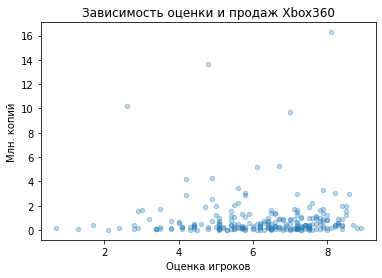

In [33]:
popular_data = actual_data.query('platform == "X360" and user_score < 11')
popular_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3);
display(popular_data['user_score'].corr(popular_data['total_sales']))
plt.title('Зависимость оценки и продаж Xbox360')
plt.ylabel('Млн. копий')
plt.xlabel('Оценка игроков');

Можно сказать, что зависимости почти нет.

Посмотрим на зависимость оценок и продаж для PS4.

0.40656790206178095

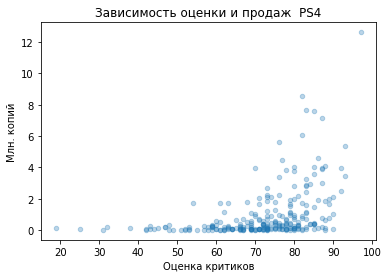

In [34]:
popular_data = actual_data.query('platform == "PS4" and critic_score < 111')
popular_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3);
display(popular_data['critic_score'].corr(popular_data['total_sales']))
plt.title('Зависимость оценки и продаж  PS4')
plt.ylabel('Млн. копий')
plt.xlabel('Оценка критиков');

Можно сказать, что зависимость есть, но небольшая. Если оценка больше 60, то продажи становятся выше.

0.006163978646213326

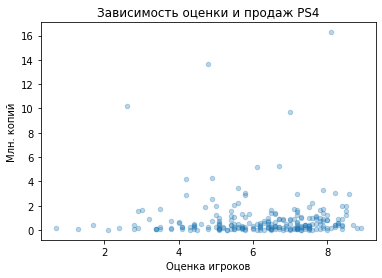

In [35]:
popular_data = actual_data.query('platform == "X360" and user_score < 11')
popular_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3);
display(popular_data['user_score'].corr(popular_data['total_sales']))
plt.title('Зависимость оценки и продаж PS4')
plt.ylabel('Млн. копий')
plt.xlabel('Оценка игроков');

Можно сказать, что зависимости почти нет.

Посмотрим на зависимость оценок и продаж для 3DS.

0.3208028695360785

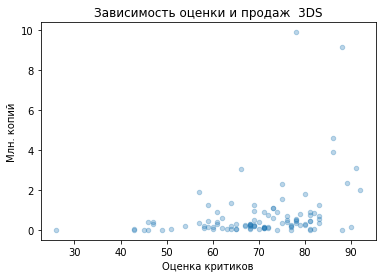

In [36]:
popular_data = actual_data.query('platform == "3DS" and critic_score < 111')
popular_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3);
display(popular_data['critic_score'].corr(popular_data['total_sales']))
plt.title('Зависимость оценки и продаж  3DS')
plt.ylabel('Млн. копий')
plt.xlabel('Оценка критиков');

Можно сказать, что зависимость есть, но небольшая. Если оценка больше 60, то продажи становятся выше.

0.19758263411038599

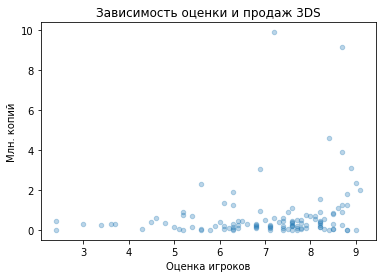

In [37]:
popular_data = actual_data.query('platform == "3DS" and user_score < 11')
popular_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3);
display(popular_data['user_score'].corr(popular_data['total_sales']))
plt.title('Зависимость оценки и продаж 3DS')
plt.ylabel('Млн. копий')
plt.xlabel('Оценка игроков');

Можно сказать, что зависимости почти нет.

Вероятнее всего такая же картина встречается и для других платформ.

### Распределение игр по жанрам

Посмотрим на распределение игр по жанрам.

,games_count,all_sales,median
genre,,,
Shooter,235,304.73,0.440
Sports,267,181.06,0.240
Platform,85,61.00,0.210
Role-Playing,370,192.80,0.140
Racing,115,53.50,0.140
Fighting,109,44.49,0.130
Action,1031,441.12,0.120
Misc,192,85.04,0.120
Simulation,80,35.12,0.120


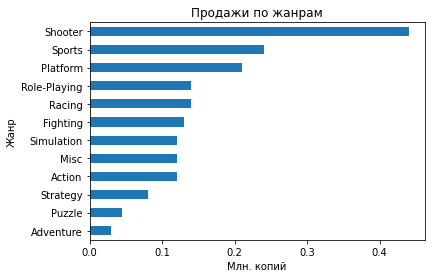

In [38]:
#genre_data = actual_data.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum'])
#genre_data.columns = ['games_count', 'all_sales']
#display(genre_data.sort_values(by='all_sales', ascending=False))
#genre_data.sort_values(by='all_sales')['all_sales'].plot(kind='barh');


genre_data = actual_data.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', 'median'])
genre_data.columns = ['games_count', 'all_sales', 'median']
display(genre_data.sort_values(by='median', ascending=False))
genre_data.sort_values(by='median')['median'].plot(kind='barh');
plt.title('Продажи по жанрам')
plt.xlabel('Млн. копий')
plt.ylabel('Жанр');

</font><font color='Blue'><b>Самые популярные жанры sports, shooter, platform, role-playing, racing. А самые непопулярные adventure, puzzle, strategy.

<div class="alert alert-info">
Вывод: Активное появление игр начинается с 1995 года. Самые популярными платформами являются Xbox360, PS3, XboxOne, 3DS, PS4. В среднем платформы пользуются спросом примерно 7 лет. Для прогноза на 2017 год взяты данные с 2012 года. Больше всего потенциала у XboxOne, PS4, WiiU, 3DS. Также можно понять, что отзывы на игры не сильно влияют на продажи. Самые популярные жанры: sports, shooter, platform, role-playing, racing.

## Портрет пользователей по регионам

### Платформы

Посмотрим популярные платформы в трех регионах и определим различия.

,eu_sales
platform,
PS4,141.09
PS3,106.85
X360,74.52
XOne,51.59
3DS,42.64
Другие,90.12


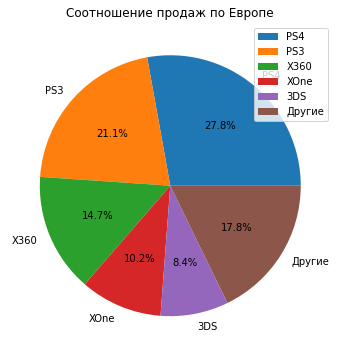

In [39]:
eu_platform = (actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
              .sort_values(by='eu_sales', ascending=False).head())
eu_platform.loc['Другие'] = (actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
              .sort_values(by='eu_sales', ascending=False).tail(6).sum())
display(eu_platform)
eu_platform.plot(kind='pie', y='eu_sales', autopct='%1.1f%%', figsize=(6, 6));
plt.title('Соотношение продаж по Европе')
plt.ylabel('');

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
Другие,90.37


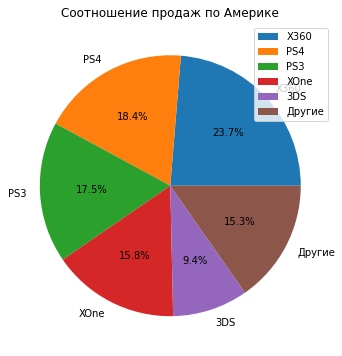

In [40]:
na_platform = (actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
              .sort_values(by='na_sales', ascending=False).head())
na_platform.loc['Другие'] = (actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
              .sort_values(by='na_sales', ascending=False).tail(6).sum())
display(na_platform)
na_platform.plot(kind='pie', y='na_sales', autopct='%1.1f%%', figsize=(6, 6));
plt.title('Соотношение продаж по Америке');
plt.ylabel('');

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
Другие,19.49


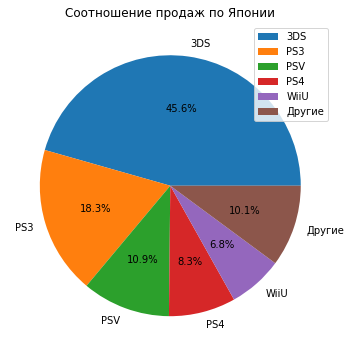

In [41]:
jp_platform = (actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
              .sort_values(by='jp_sales', ascending=False).head())
jp_platform.loc['Другие'] = (actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
              .sort_values(by='jp_sales', ascending=False).tail(6).sum())
display(jp_platform)
jp_platform.plot(kind='pie', y='jp_sales', autopct='%1.1f%%', figsize=(6, 6));
plt.title('Соотношение продаж по Японии');
plt.ylabel('');

- В Европе самые популярные платформы: PS4, PS3, X360, XOne, 3DS 
- В Америке самые популярные платформы: X360, PS4, PS3, XOne, 3DS
- В Японии самые популярные платформы: 3DS, PS3, PSV, PS4, WiiU

### Жанры

Посмотрим популярные жанры в трех регионах и определим различия.

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.08
Role-Playing,48.53
Racing,27.29
Другие,89.10


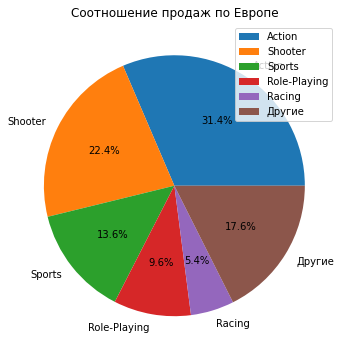

In [42]:
eu_genre = (actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
              .sort_values(by='eu_sales', ascending=False).head())
eu_genre.loc['Другие'] = (actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
              .sort_values(by='eu_sales', ascending=False).tail(7).sum())
display(eu_genre)
eu_genre.plot(kind='pie', y='eu_sales', autopct='%1.1f%%', figsize=(6, 6));
plt.title('Соотношение продаж по Европе');
plt.ylabel('');

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19
Другие,84.64


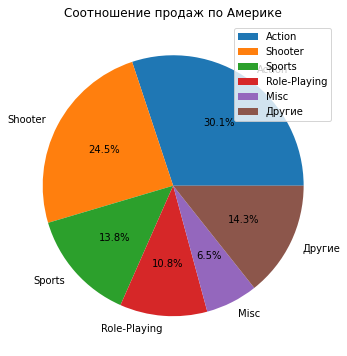

In [43]:
na_genre = (actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
              .sort_values(by='na_sales', ascending=False).head())
na_genre.loc['Другие'] = (actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
              .sort_values(by='na_sales', ascending=False).tail(7).sum())
display(na_genre)
na_genre.plot(kind='pie', y='na_sales', autopct='%1.1f%%', figsize=(6, 6));
plt.title('Соотношение продаж по Америке');
plt.ylabel('');

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Другие,41.63


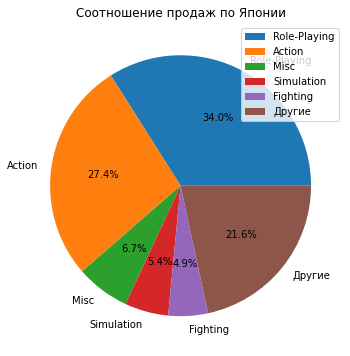

In [44]:
jp_genre = (actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
              .sort_values(by='jp_sales', ascending=False).head())
jp_genre.loc['Другие'] = (actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
              .sort_values(by='jp_sales', ascending=False).tail(7).sum())
display(jp_genre)
jp_genre.plot(kind='pie', y='jp_sales', autopct='%1.1f%%', figsize=(6, 6));
plt.title('Соотношение продаж по Японии');
plt.ylabel('');

- В Европе самые популярные жанры: Action, Sports, Shooter, Misc, Racing
- В Америке самые популярные жанры: Action, Sports, Shooter, Misc, Role-Playing
- В Японии самые популярные жанры: Role-Playing, Action, Simulation, Misc, Fighting

### ESRB

Посмотрим популярность игр с разными рейтингами esrb в трех регионах и определим различия.

,sum,count
,eu_sales,eu_sales
rating,,
E,113.02,394
E10+,55.37,306
M,193.96,498
T,52.96,412
no rating,91.50,1275


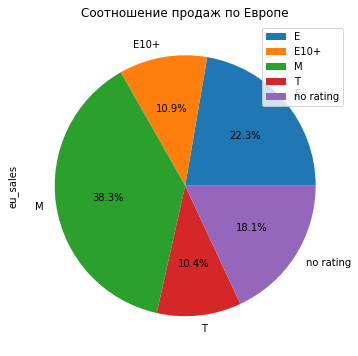

In [45]:
eu_rating_data = actual_data.pivot_table(index='rating', values='eu_sales', aggfunc=['sum', 'count'])
display(eu_rating_data)
eu_rating_data.columns = ['eu_sales', 'games_count']
eu_rating_data.query('eu_sales > 0').plot(kind='pie', y='eu_sales', autopct='%1.1f%%', figsize=(6, 6));
plt.title('Соотношение продаж по Европе');

,sum,count
,na_sales,na_sales
rating,,
E,114.37,394
E10+,75.70,306
M,231.57,498
T,66.02,412
no rating,103.31,1275


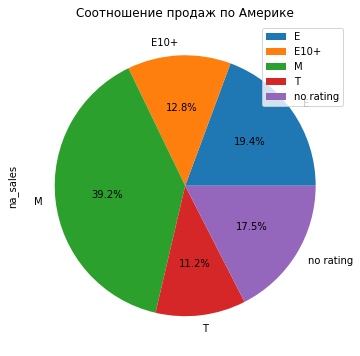

In [46]:
na_rating_data = actual_data.pivot_table(index='rating', values='na_sales', aggfunc=['sum', 'count'])
display(na_rating_data)
na_rating_data.columns = ['na_sales', 'games_count']
na_rating_data.query('na_sales > 0').plot(kind='pie', y='na_sales', autopct='%1.1f%%', figsize=(6, 6));
plt.title('Соотношение продаж по Америке');

,sum,count
,jp_sales,jp_sales
rating,,
E,28.33,394
E10+,8.19,306
M,21.20,498
T,26.02,412
no rating,108.84,1275


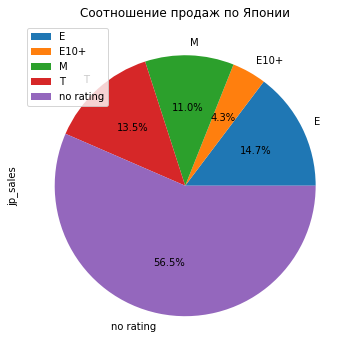

In [47]:
jp_rating_data = actual_data.pivot_table(index='rating', values='jp_sales', aggfunc=['sum', 'count'])
display(jp_rating_data)
jp_rating_data.columns = ['jp_sales', 'games_count']
jp_rating_data.query('jp_sales > 0').plot(kind='pie', y='jp_sales', autopct='%1.1f%%', figsize=(6, 6));
plt.title('Соотношение продаж по Японии');

Самые популярные игры с рейтингом M для Европы и Америки. В Японии у большого кол-ва игр не указан рейтинг esrb.

<div class="alert alert-info">
Вывод: В Европе и Америке схожи предпочтения в платформах и жанрах. Самые популярные жанры: Action, Sports, Shooter, Misc; Платформы: PS3, X360, Wii, DS. В Японии же немного другая картина. Жанры: Role-Playing, Action, Sports, Misc, Platform; Платформы: DS, 3DS, PS3, PSP, Wii. В Европе и Америке покупают иргы с рейтингом M активнее всего. У многих игр в Японии рейтинг не определен.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [48]:
#xbox_stat = actual_data.query('platform == "XOne"')
#pc_stat = actual_data.query('platform == "PC"')

xbox_stat = actual_data.query('platform == "XOne" and user_score < 11')
pc_stat = actual_data.query('platform == "PC" and user_score < 11')
display(xbox_stat['user_score'].mean())
display(pc_stat['user_score'].mean())

6.521428571428572

6.4286407766990274

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (=).
Альернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [50]:
alpha = 0.05
platform_score_results = st.ttest_ind(xbox_stat['user_score'], pc_stat['user_score'])
print('p-value:', platform_score_results.pvalue)
if platform_score_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.5535080500643661
Нет оснований отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports

Средние пользовательские рейтинги платформ Action и Sports разные.

In [51]:
#action_stat = actual_data.query('genre == "Action"')
#sports_stat = actual_data.query('genre == "Sports"')

action_stat = actual_data.query('genre == "Action" and user_score < 11')
sports_stat = actual_data.query('genre == "Sports" and user_score < 11')
display(action_stat['user_score'].mean())
display(sports_stat['user_score'].mean())

6.825047801147227

5.455670103092784

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [52]:
alpha = 0.05
genre_score_results = st.ttest_ind(action_stat['user_score'], sports_stat['user_score'])
print('p-value:', genre_score_results.pvalue)
if genre_score_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


<div class="alert alert-info">
Вывод: Чтобы сформулировать нулевую гипотезу лучше использовать логику: истинные средние двух выборок равны. А альтернативную гипотезу: истинные средние двух выборок не равны для двусторонней гипотезы. Так как в гипотезе не спрашивается больше или меньше одно значение, то пременяем двустороннюю гипотезу. Выборки две, и они не завимы, значит используем двухвыборочный t-тест (ttest_ind)
    
- В первой проверке не отклоняем нулевую гипотезу. Есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC равны.
- Во второй проверке отклоняем нулевую гипотезу в пользу альтернативной. Есть основания говрить, что средние пользовательские рейтинги жанров Action и Sports  не равны.
    

## Вывод

<div class="alert alert-info">
<font size="4", color = "black"><b>Вывод</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Нужно было проанализировать данные о продажах игр до 2016 года и проверить несколько гипотез. В полученных данных встретились пустые значения, которые пришлось заменить на значения-триггеры. В ходе работы нужно было привести столбцы к нижнему регистру и создать новый. Выяснилось, что самыми популярными платформами являются Xbox360, PS3, XboxOne, 3DS, PS4; жанрами: sports, shooter, platform, role-playing, racing. Больше всего потенциала в 2017 году у Xbox One, PS4, WiiU, 3DS. Отзывы на игры не сильно влияют на продажи. В Европе и Америке схожи предпочтения в жанрах и платформах. В Японии покупают игры без рейтинга esrb чаще всего. В Европе и Америке же покупают игры с рейтингом M больше всего. Были проверенны 2 гипотезы, из которых выяснилось, что средние пользовательские рейтинги платформ Xbox One и PC равны, а средние пользовательские рейтинги жанров Action и Sports не равны.